# <center> Analise de venda <center>

In [1]:
# importa as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import locale
locale.setlocale(locale.LC_ALL,'pt_BR.utf8')

'pt_BR.utf8'

In [6]:
# importa dados
df=pd.read_excel('venda.xlsx',sheet_name='venda_dia',skiprows=1)

In [7]:
df.head(1)

,Cod_loja,Data,Quantidade,Valor_saida,Custo,Lucro,Oferta
0,Loja A,2022-01-02,3156.534,18384.77,13303.433616,4689.356313,Sim


In [8]:
df.shape

(3568, 7)

In [9]:
df['Oferta']

0        Sim
1        Não
2        Sim
3        Não
4        Sim
        ... 
3563     Não
3564    club
3565    club
3566    club
3567     NaN
Name: Oferta, Length: 3568, dtype: object

In [10]:
df.Oferta.head()

0    Sim
1    Não
2    Sim
3    Não
4    Sim
Name: Oferta, dtype: object

In [11]:
df.Oferta.tail()

3563     Não
3564    club
3565    club
3566    club
3567     NaN
Name: Oferta, dtype: object

In [12]:
df.Oferta.value_counts()

Não     1574
Sim     1384
club     609
Name: Oferta, dtype: int64

In [13]:
df.isna().sum()

Cod_loja       1
Data           1
Quantidade     0
Valor_saida    0
Custo          1
Lucro          1
Oferta         1
dtype: int64

In [17]:
df[df['Cod_loja'].isna()==True]

,Cod_loja,Data,Quantidade,Valor_saida,Custo,Lucro,Oferta
3567,NaN,NaT,3.035100e+07,1.907231e+08,NaN,NaN,NaN


In [18]:
df.drop(3567,axis=0)

,Cod_loja,Data,Quantidade,Valor_saida,Custo,Lucro,Oferta
0,Loja A,2022-01-02,3156.534,18384.77,13303.433616,4689.356313,Sim
1,Loja A,2022-01-04,13688.551,88127.03,61780.652100,24164.240219,Não
2,Loja A,2022-01-05,1865.757,11520.41,8389.584055,2874.891542,Sim
3,Loja A,2022-01-07,10603.659,70340.15,50013.897136,18607.695020,Não
4,Loja A,2022-01-08,6964.168,42276.56,32473.231966,8642.052942,Sim
...,...,...,...,...,...,...,...
3562,000005,2023-11-10,7.000,34.93,45.430000,-10.849300,Não
3563,000005,2023-11-17,288.000,1494.72,1494.720000,-14.947200,Não
3564,000005,2023-11-18,8057.000,37712.00,35773.506517,882.928699,club
3565,000005,2023-11-21,12466.000,90378.78,93003.303613,-6295.754166,club


In [20]:
df.shape

(3568, 7)

In [23]:
# Média de venda
media=df.Valor_saida.mean()
print("Média de venda {}".format(locale.currency(media,grouping=True)))

Média de venda R$ 106.907,58


In [25]:
# Médiana
mediana=df.Valor_saida.median()
print("Mediana de venda {}".format(locale.currency(mediana,grouping=True)))

Mediana de venda R$ 41.988,56


In [26]:
# Desvio padrão
desvio=df.Valor_saida.std()
print("Desvio paradrão de venda {}".format(locale.currency(desvio,grouping=True)))

Desvio paradrão de venda R$ 3.192.401,63


In [27]:
# Crescimento mensal do ano
df['Mes']=df['Data'].dt.month
df['Ano']=df['Data'].dt.year

df_ano=df[df['Ano']==2023]
df_mes=df_ano.groupby(['Mes','Ano'])['Valor_saida'].sum().reset_index()

crescimento=df_mes['Valor_saida'].pct_change()

print("Crescimento mensal")
crescimento


Crescimento mensal


0          NaN
1     0.036144
2     0.060710
3     0.069405
4     0.023233
5    -0.002645
6     0.096014
7    -0.041958
8    -0.082155
9     0.071910
10   -0.151916
Name: Valor_saida, dtype: float64

Text(0.5, 1.0, 'Gráfico de Taxa de Crescimento')

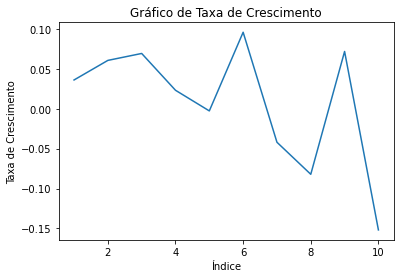

In [34]:
plt.plot(crescimento)
plt.xlabel('Índice')
plt.ylabel('Taxa de Crescimento')
plt.title('Gráfico de Taxa de Crescimento')

In [35]:
import seaborn as sns

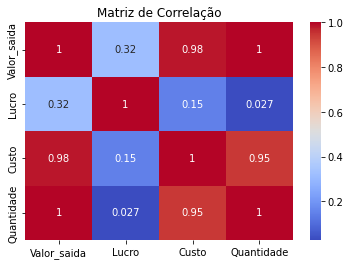

In [38]:
# Correlação entre variaveis 
correlacao= df[['Valor_saida','Lucro','Custo','Quantidade']].corr()
sns.heatmap(correlacao, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

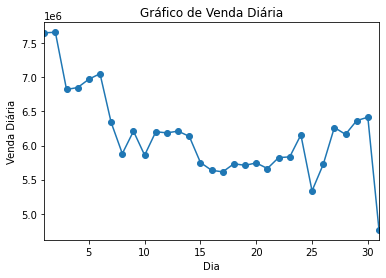

In [52]:
# venda por dia 
df['Dia']=df['Data'].dt.day
df_venda_dia=df.groupby('Dia')['Valor_saida'].sum().reset_index().sort_values('Dia',ascending=True)



# Cria o gráfico de linha
plt.plot(df_venda_dia['Dia'], df_venda_dia['Valor_saida'], marker='o', linestyle='-')
plt.xlim(df_venda_dia['Dia'].min(), df_venda_dia['Dia'].max())
# Formatação das datas no eixo x


# Adiciona rótulos aos eixos
plt.xlabel('Dia')
plt.ylabel('Venda Diária')
plt.title('Gráfico de Venda Diária')

# Exibe o gráfico
plt.show()

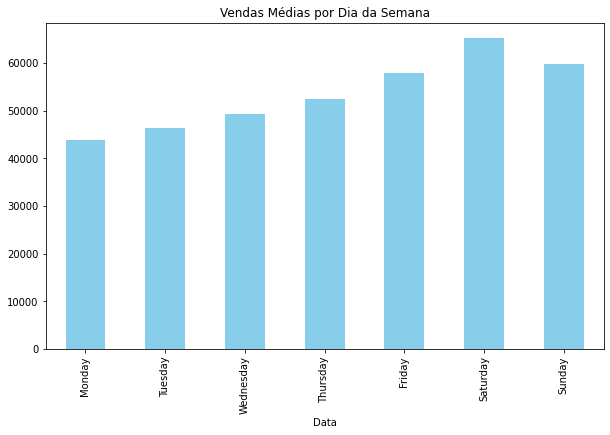

In [59]:
# Venda por semana 
vendas_por_dia_semana = df.groupby(df['Data'].dt.day_name())['Valor_saida'].mean()
dias_ordem = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
vendas_por_dia_semana = vendas_por_dia_semana.reindex(dias_ordem)
vendas_por_dia_semana.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Vendas Médias por Dia da Semana')
plt.show()

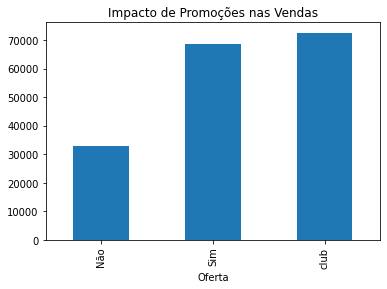

In [60]:

df.groupby('Oferta')['Valor_saida'].mean().plot(kind='bar')
plt.title('Impacto de Promoções nas Vendas')
plt.show()

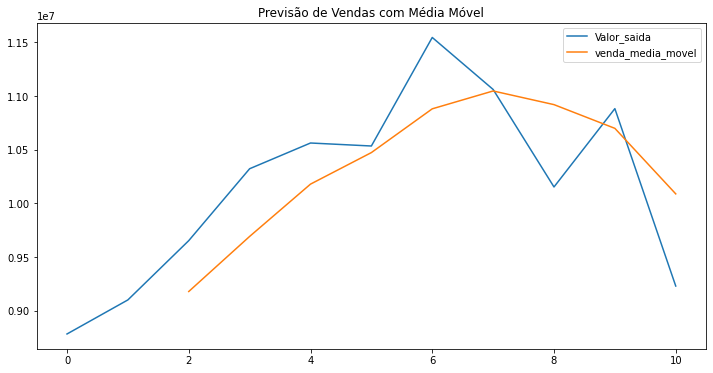

In [64]:
df_mes['venda_media_movel'] = df_mes['Valor_saida'].rolling(window=3).mean()
df_mes[['Valor_saida', 'venda_media_movel']].plot(figsize=(12, 6))
plt.title('Previsão de Vendas com Média Móvel')
plt.show()